# Mario Enrique Pisquiy Gomez
### Carné 20200399

## Importación de librerías

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Carga de la data

In [37]:
df = pd.read_csv('Spotify_Youtube.csv')

## Exploración de la data

In [38]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [39]:
df = df.drop(columns=[
    'Unnamed: 0', 
    'Artist', 
    'Url_spotify', 
    'Track', 
    'Album', 
    'Album_type',
    'Uri',
    'Url_youtube', 
    'Title', 
    'Channel', 
    'Views', 
    'Likes',
    'Comments', 
    'Description',
    'Licensed', 
    'official_video'])


In [40]:
df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,6.172597e+08


In [41]:
df.shape

(20718, 12)

In [42]:
df.dtypes

Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Stream              float64
dtype: object

In [43]:
df.isna().sum()

Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Stream              576
dtype: int64

In [44]:
dataNa = df.isna().sum()
dataNa[11]/df.shape[0]

0.02780191138140747

In [45]:
# Porcentaje de la data que es NA, por ser un 2% del total de las observaciones, por ello decido eliminarla
df = df.dropna()

In [46]:
#Cambio la columna Stream a int porque el número de Streams debe ser un entero y para poder ver el número completo
df['Stream'] = df['Stream'].astype('int')

array([[<AxesSubplot: title={'center': 'Danceability'}>,
        <AxesSubplot: title={'center': 'Energy'}>,
        <AxesSubplot: title={'center': 'Key'}>],
       [<AxesSubplot: title={'center': 'Loudness'}>,
        <AxesSubplot: title={'center': 'Speechiness'}>,
        <AxesSubplot: title={'center': 'Acousticness'}>],
       [<AxesSubplot: title={'center': 'Instrumentalness'}>,
        <AxesSubplot: title={'center': 'Liveness'}>,
        <AxesSubplot: title={'center': 'Valence'}>],
       [<AxesSubplot: title={'center': 'Tempo'}>,
        <AxesSubplot: title={'center': 'Duration_ms'}>,
        <AxesSubplot: title={'center': 'Stream'}>]], dtype=object)

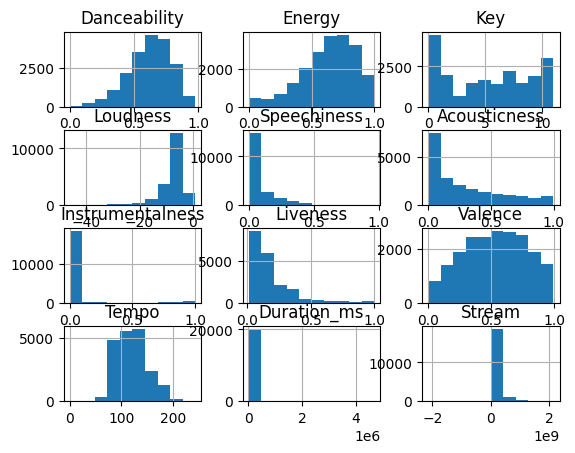

In [58]:
df.hist()

<AxesSubplot: >

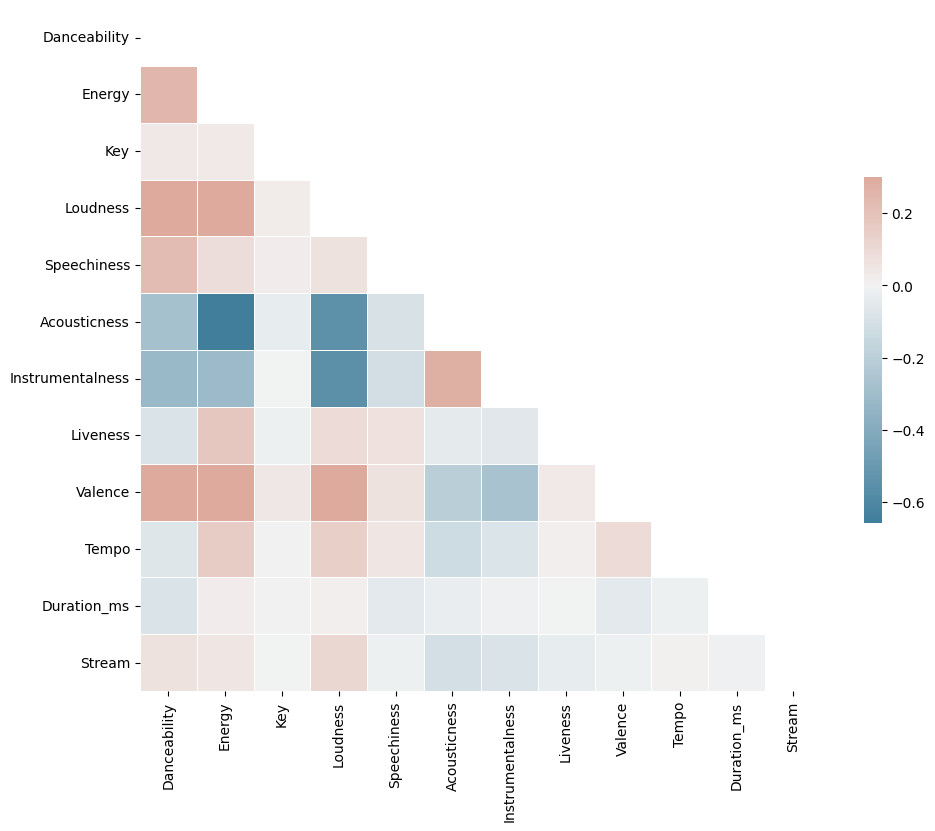

In [66]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 400x400 with 0 Axes>

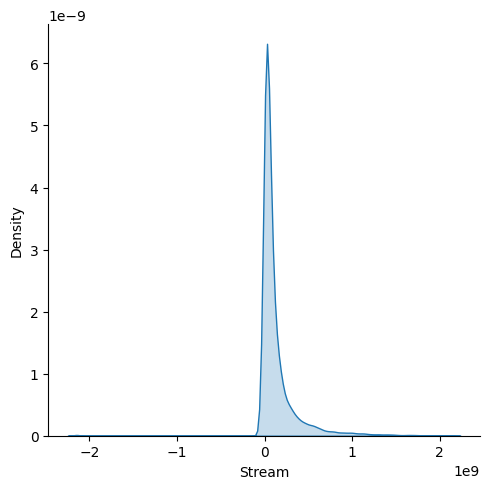

In [67]:
plt.figure(figsize=(4,4))
sns.displot(data = df, x = 'Stream', kind='kde', fill=True)
plt.show()

## Split Data

In [68]:
y = df.Stream
df = df.drop(columns=['Stream'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=100)

## Procesamiento de la data

In [79]:
num_pipeline = Pipeline([
                            ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                            ('std_scaler', StandardScaler())                            
                        ])

In [80]:
cat_pipeline = Pipeline([
                        ('oh_enc', OneHotEncoder(drop='first')),
                        ])

In [83]:
num_attribs = df.select_dtypes(include='number').columns
cat_attribs = df.select_dtypes(exclude='number').columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

## Modelo

In [86]:
predictor=RandomForestRegressor()
model_pip = Pipeline([('col_transform', full_pipeline),
                      ('model', predictor)])

In [ ]:
model = XGBRegressor

In [92]:
params_model = [{'model': [XGBRegressor()],
                 'model__n_estimators':[50,100,130,150,170,200],
                 'model__max_depth': [1,3,5,7,10],
                 'model__eta': [0.001, 0.01, 0.1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [93]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.01, 'model__max_depth': 10, 'model__n_estimators': 50}


In [94]:
params_model = [{'model': [AdaBoostRegressor()],
                 'model__n_estimators':[50,100,150,200],
                 'model__learning_rate': [1,3,5],
                 'model__loss': ['linear','square','exponential'],
                 'model__random_state': [42]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [95]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': AdaBoostRegressor(learning_rate=5, loss='exponential', n_estimators=200,
                  random_state=42), 'model__learning_rate': 5, 'model__loss': 'exponential', 'model__n_estimators': 200, 'model__random_state': 42}


In [96]:
params_model = [{'model': [RandomForestRegressor()],
                 'model__n_estimators':[30,50,100,150,200],
                 'model__max_depth':[5,10,15,20],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [97]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=-1,
                      random_state=42), 'model__max_depth': 20, 'model__n_estimators': 200, 'model__n_jobs': -1, 'model__random_state': 42}


In [98]:
params_model = [{'model': [XGBRegressor()],
                 'model__n_estimators':[50],
                 'model__max_depth': [10],
                 'model__eta': [0.01]},

                {'model': [AdaBoostRegressor()],
                 'model__n_estimators':[200],
                 'model__learning_rate': [5],
                 'model__loss': ['exponential'],
                 'model__random_state': [42]},

                {'model': [RandomForestRegressor()],
                 'model__n_estimators':[200],
                 'model__max_depth':[20],
                 'model__random_state':[42],
                 'model__n_jobs':[-1]}
]
grid_model = GridSearchCV(model_pip,params_model,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

In [99]:
entrenador = grid_model.fit(X_train,y_train)
print('Mejores modelo:', grid_model.best_params_)

Mejores modelo: {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...), 'model__eta': 0.01, 'model__max_depth': 10, 'model__n_estimators': 50}
